In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [71]:
data1=pd.read_csv("D:\Python\Project\Sep-2021.csv",encoding='latin-1')
D1=data1.iloc[3:]
D1=D1.T
D1.columns=D1.iloc[0]
D1.index=D1['Sl.No.']
D1.columns=D1.iloc[1]
D1=D1[2:]
col_to_keep=['Schedules','Fleet Held','Fleet Utilisation (%)','% off road  vehicles','Schedule kms (in lakh)', 'Effective Kilometers (in lakh)']
D1.drop(columns=[col for col in D1.columns if col not in col_to_keep],inplace=True)
D1.head()
D1

Factor,Schedules,Fleet Held,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh)
Sl.No.,,,,,,
BNG©,556,738,60.4,6.2,54.66,57.39
RMN,449,503,81.5,5.9,34.43,39.48
TMK,568,619,85.3,5.1,55.43,54.49
KLR,504,544,81.4,1.8,42.41,44.45
CBP,518,564,85.3,2.6,44.17,50.42
MYS(U),372,431,76.9,6,17.32,17.26
MYS(R),588,675,79.3,6.3,58.04,60.9
MDY,397,451,82.3,7.8,35.96,36.56
CJR,424,518,81.6,6,40.62,43.12


In [72]:
D1=D1[:17]
D1
#adding a new column as city id
D1['City_Id'] = range(1, len(D1) + 1)
D1.columns
#remove empty rows
D1.dropna(inplace=True)
D1

C:\Users\abhib\AppData\Local\Temp\ipykernel_19212\3718880839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D1['City_Id'] = range(1, len(D1) + 1)
C:\Users\abhib\AppData\Local\Temp\ipykernel_19212\3718880839.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D1.dropna(inplace=True)


Factor,Schedules,Fleet Held,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id
Sl.No.,,,,,,,
BNG©,556,738,60.4,6.2,54.66,57.39,1
RMN,449,503,81.5,5.9,34.43,39.48,2
TMK,568,619,85.3,5.1,55.43,54.49,3
KLR,504,544,81.4,1.8,42.41,44.45,4
CBP,518,564,85.3,2.6,44.17,50.42,5
MYS(U),372,431,76.9,6,17.32,17.26,6
MYS(R),588,675,79.3,6.3,58.04,60.9,7
MDY,397,451,82.3,7.8,35.96,36.56,8
CJR,424,518,81.6,6,40.62,43.12,9


In [73]:
D1.columns

Index(['Schedules', 'Fleet Held', 'Fleet Utilisation (%)',
       '% off road  vehicles', 'Schedule kms (in lakh)',
       'Effective Kilometers (in lakh)', 'City_Id'],
      dtype='object', name='Factor')

In [74]:
#Effective passenger density
#effPassDensity=(('Fleet Utilisation(%)')*0.01)*('Fleet Held')

FleetUtilisation=D1['Fleet Utilisation (%)']

FleetHeldArray=D1['Fleet Held']
FleetHeldArray=FleetHeldArray.astype('float64')
FleetUtilisation=FleetUtilisation.astype('float64')
FleetUtilisation=FleetUtilisation*0.01
EffPassDensity=np.multiply(FleetUtilisation,FleetHeldArray)
D1['EffPassDensity']=EffPassDensity
D1


C:\Users\abhib\AppData\Local\Temp\ipykernel_19212\3948396240.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D1['EffPassDensity']=EffPassDensity


Factor,Schedules,Fleet Held,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Sl.No.,,,,,,,,
BNG©,556,738,60.4,6.2,54.66,57.39,1,445.752
RMN,449,503,81.5,5.9,34.43,39.48,2,409.945
TMK,568,619,85.3,5.1,55.43,54.49,3,528.007
KLR,504,544,81.4,1.8,42.41,44.45,4,442.816
CBP,518,564,85.3,2.6,44.17,50.42,5,481.092
MYS(U),372,431,76.9,6,17.32,17.26,6,331.439
MYS(R),588,675,79.3,6.3,58.04,60.9,7,535.275
MDY,397,451,82.3,7.8,35.96,36.56,8,371.173
CJR,424,518,81.6,6,40.62,43.12,9,422.688


In [75]:
D1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, BNG© to CDG
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Schedules                       16 non-null     object 
 1   Fleet Held                      16 non-null     object 
 2   Fleet Utilisation (%)           16 non-null     object 
 3   % off road  vehicles            16 non-null     object 
 4   Schedule kms (in lakh)          16 non-null     object 
 5   Effective Kilometers (in lakh)  16 non-null     object 
 6   City_Id                         16 non-null     int64  
 7   EffPassDensity                  16 non-null     float64
dtypes: float64(1), int64(1), object(6)
memory usage: 1.1+ KB


In [76]:
D1.head()

Factor,Schedules,Fleet Held,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Sl.No.,,,,,,,,
BNG©,556,738,60.4,6.2,54.66,57.39,1,445.752
RMN,449,503,81.5,5.9,34.43,39.48,2,409.945
TMK,568,619,85.3,5.1,55.43,54.49,3,528.007
KLR,504,544,81.4,1.8,42.41,44.45,4,442.816
CBP,518,564,85.3,2.6,44.17,50.42,5,481.092


In [77]:
D1.tail()

Factor,Schedules,Fleet Held,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Sl.No.,,,,,,,,
MNG,446,600,64.4,7.5,42.92,42.73,12,386.400
PTR,470,553,78.3,5.1,37.38,39.06,13,432.999
DVG,324,354,91.8,4.4,32.27,32.56,14,324.972
SMG,297,352,77.8,9.9,30.47,31.48,15,273.856
CDG,257,294,87.2,6.9,27.28,27.79,16,256.368


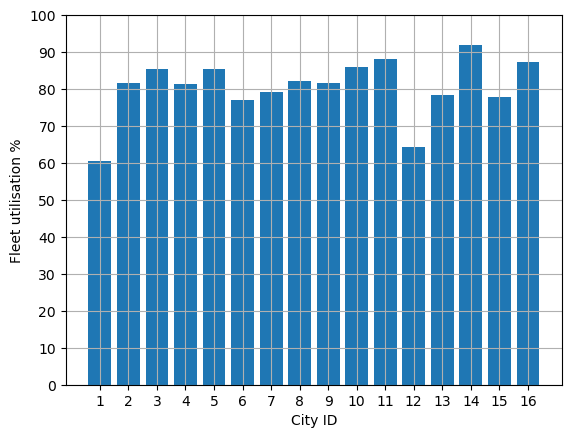

In [78]:
import matplotlib.pyplot as plt
X=D1['City_Id']
Y=D1['Fleet Utilisation (%)'].astype(float)
plt.bar(X,Y)
plt.xlabel('City ID')
plt.ylabel('Fleet utilisation %')
plt.xticks(X)  # Set x-axis ticks to match city IDs
# Set y-axis range with a step of 10
plt.ylim(0, 100)  # Set the y-axis range from 0 to 100
plt.yticks(range(0, 101, 10))  # Set y-axis ticks with a step of 10
plt.grid(True)
plt.show()


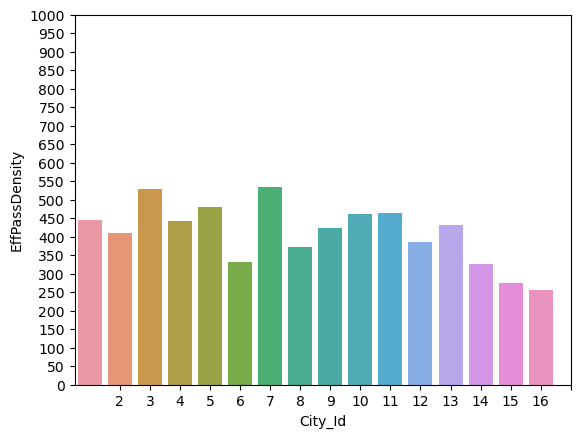

In [79]:
X=D1['City_Id']
Y=D1['EffPassDensity']
sns.barplot(x=X,y=Y,orient='v')
plt.xticks(X)
plt.ylim(0, 1000)  # Set the y-axis range from 0 to 100
plt.yticks(range(0, 1001, 50))
plt.show()


## Descriptive Statistic Analysis
Mean of EffectivePassengerDensity = meanEPD

In [80]:
meanEPD=np.mean(D1['EffPassDensity'])
print('Mean of Effective Passenger Density:',meanEPD)

D1['EffPassDensity'].values


Mean of Effective Passenger Density: 410.610625


array([445.752, 409.945, 528.007, 442.816, 481.092, 331.439, 535.275,
       371.173, 422.688, 461.82 , 465.168, 386.4  , 432.999, 324.972,
       273.856, 256.368])

In [81]:
std_by_city = D1['EffPassDensity'].std()
variance=std_by_city**2
print('variance:',variance)
print('Standard deviation:',std_by_city)

variance: 6736.367351983333
Standard deviation: 82.07537603924415


In [82]:
#calculate the (X-mean) for each city and it as a column
XdiffMean=D1['EffPassDensity'][:15].values-meanEPD


NewD1={
    'City Id':D1['City_Id'][:15].values,
    'EffPassDensity':D1['EffPassDensity'][:15].values,
    'Mean Variations':XdiffMean
}
NewD1=pd.DataFrame(NewD1)
NewD1

,City Id,EffPassDensity,Mean Variations
0,1,445.752,35.141375
1,2,409.945,-0.665625
2,3,528.007,117.396375
3,4,442.816,32.205375
4,5,481.092,70.481375
5,6,331.439,-79.171625
6,7,535.275,124.664375
7,8,371.173,-39.437625
8,9,422.688,12.077375
9,10,461.820,51.209375


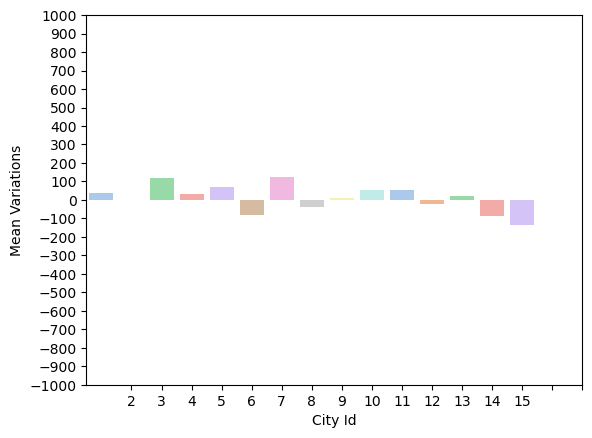

In [83]:
sns.barplot(x=NewD1['City Id'],y=NewD1['Mean Variations'],palette='pastel')
plt.xticks(X)
plt.ylim(0, 1000)  # Set the y-axis range from 0 to 100
plt.yticks(range(-1000, 1001, 100))
plt.show()

C:\Users\abhib\AppData\Local\Temp\ipykernel_19212\2811182317.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pdf_values, shade = True)


Sl.No.
BNG©       445.752
RMN        409.945
TMK        528.007
KLR        442.816
CBP        481.092
MYS(U)     331.439
MYS(R)     535.275
MDY        371.173
CJR        422.688
HSN        461.820
CKM        465.168
MNG        386.400
PTR        432.999
DVG        324.972
SMG        273.856
CDG        256.368
256.368        NaN
Name: EffPassDensity, dtype: float64

Skewness: nan


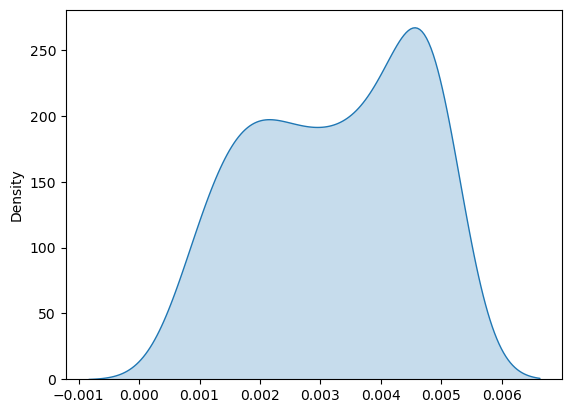

In [113]:
import statistics as stats
from scipy.stats import norm 
dfmean = np.mean(D1['EffPassDensity'])
sd = np.std(D1['EffPassDensity'])
sorted_data = D1['EffPassDensity'].sort_values()
X=np.linspace(D1['EffPassDensity'].min(),D1['EffPassDensity'].max(),100)
pdf_values = norm.pdf(X, dfmean, sd)
sns.kdeplot(pdf_values, shade = True)

from scipy.stats import skew
print(D1['EffPassDensity'])
data_skewness = skew(D1['CityId']D1['EffPassDensity'])
print()
print("Skewness:", data_skewness)


In [85]:
'''Stats = D1.describe(include='all')
rows = Stats.index.tolist()
Stats
D1

for i in rows:
    for j in D1.columns:
        value = D1.loc[i, j]
        
        if isinstance(value, str):
            cleaned_value = value.replace('.', '')  # Remove dots
            try:
                D1.loc[i, j] = float(cleaned_value)
            except ValueError:
                pass  # Handle values that cannot be converted

D1
for i in rows:
    for j in D1.columns:
        print(i,j,type(D1.loc[i,j]))
        print(D1.loc[i,j])

SyntaxError: incomplete input (1494821967.py, line 1)

In [ ]:

D1
    

In [ ]:
'''for j in cols:
    for i in Stats.columns:
        if j == 'mean' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].mean()
        elif j == 'std' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].std()
        elif j == 'min' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].min()
        elif j == 'max' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].max()
        elif j == '25%' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].quantile(q=0.25)
        elif j == '50%' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].quantile(q=0.50)
        elif j == '75%':
            Stats.loc[j, i] = D1[i].quantile(q=0.75)

Stats'''

<class 'numpy.float64'>


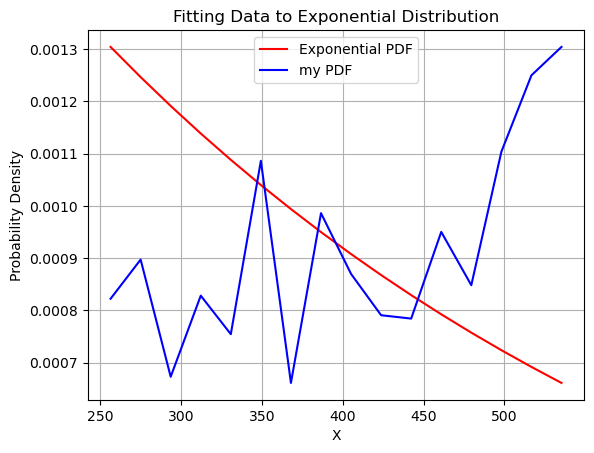

[0.00130441 0.00124666 0.00119147 0.00113872 0.0010883  0.00104012
 0.00099407 0.00095006 0.000908   0.0008678  0.00082938 0.00079266
 0.00075756 0.00072402 0.00069197 0.00066133] [0.00082245 0.00089739 0.00067314 0.00082835 0.00075462 0.00108646
 0.00066133 0.00098625 0.00086996 0.00079088 0.00078446 0.00095035
 0.00084839 0.00110371 0.00125002 0.00130441]


In [86]:
from scipy.stats import expon

# Given data
data = D1['EffPassDensity'][0:16].to_numpy()
# Calculate lambda for the exponential distribution
lambda_param = 1 / data.mean()
print(type(data[0]))
myData=data.astype('float64')


# Generate x values for the plot
x_range = np.linspace(min(data), max(data), 16)
Data=-lambda_param*x_range
myData=-lambda_param*myData
# Calculate the exponential PDF values
pdf_values = np.exp(Data)
myPdf=np.exp(myData)

pdf_values=lambda_param*pdf_values
myPdf=lambda_param*myPdf

# Plot the exponential PDF curve
plt.plot(x_range, pdf_values, color='red', label='Exponential PDF')
plt.plot(x_range, myPdf, color='blue', label='my PDF')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Fitting Data to Exponential Distribution')
plt.legend()
plt.grid(True)
plt.show()

print(pdf_values,myPdf)

In [102]:
import statistics as stats
from scipy.stats import norm 
import scipy.stats
Xfactor=D1['EffPassDensity'][:16].values
Yfactor=D1['Effective Kilometers (in lakh)'][:16].values
converted_values = []

for value in Yfactor:
    float_value = float(value)  # Convert string to float
    converted_values.append(float_value)
print(Xfactor.size,Yfactor.size)
R=scipy.stats.pearsonr(Xfactor,converted_values)
print("Coefficient of correlation between EffPassDensity & Effective Kilometers (in lakh):",R[0])


16 16
Coefficient of correlation between EffPassDensity & Effective Kilometers (in lakh): 0.8686217329775099


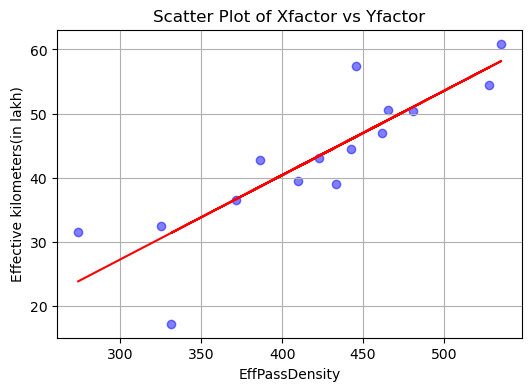

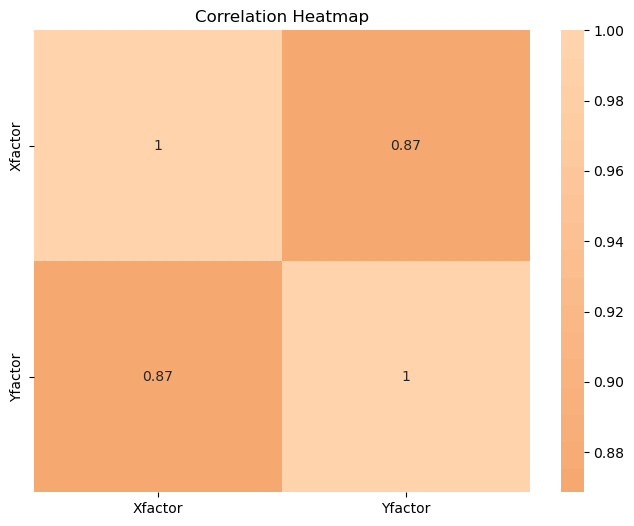

In [88]:
data = {
    'Xfactor': D1['EffPassDensity'][:16].values,
    'Yfactor': D1['Effective Kilometers (in lakh)'][:16].values
}
Df=pd.DataFrame(data)
corrMatrix=Df.corr()
corrMatrix
Df['Xfactor'] = pd.to_numeric(Df['Xfactor'])
Df['Yfactor'] = pd.to_numeric(Df['Yfactor'])

subset_df=Df[:15]
slope, intercept = np.polyfit(subset_df['Xfactor'], subset_df['Yfactor'], 1)
regression_line = slope * subset_df['Xfactor'] + intercept

plt.figure(figsize=(6, 4))
plt.scatter(Df['Xfactor'][:15], Df['Yfactor'][:15], color='blue', alpha=0.5)
plt.plot(subset_df['Xfactor'], regression_line, color='red', label='Regression Line')
plt.xlabel('EffPassDensity')
plt.ylabel('Effective kilometers(in lakh)')
plt.title('Scatter Plot of Xfactor vs Yfactor')
plt.grid(True)

plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(corrMatrix, annot=True,center=0,linecolor='blue')
plt.title('Correlation Heatmap')
plt.show()


In [110]:

from scipy.stats import skew

data_skewness = skew(D1['EffPassDensity'])
print("Skewness:", data_skewness)

Skewness: nan


In [130]:
DF={'Sept2021':[D1['EffPassDensity'].count(),D1['EffPassDensity'].mean(),D1['EffPassDensity'].std(),D1['EffPassDensity'].min(),D1['EffPassDensity'].max(),R[0]]}
Df=pd.DataFrame(DF)
Df=Df.T
Df

,0,1,2,3,4,5
Sept2021,16.0,410.610625,82.075376,256.368,535.275,0.868622


In [140]:
Df.to_csv("Monthly.csv",mode="a",header=False)

In [141]:
data=pd.read_csv("Monthly.csv")
data

,Unnamed: 0,0,1,2,3,4,5
0,April2022,15.0,479.345200,143.730376,271.502,897.893,0.957262
1,Sept2021,16.0,410.610625,82.075376,256.368,535.275,0.868622
